# Visualisation notebook
In the following notebook you will see some visualisations of 
YouTube views of the indie band [Billie Garlic](https://open.spotify.com/artist/2KZoVTprHSLoYX7G38MBh9?si=R92K6MuyS7CVYXcQfcbmHw&dl_branch=1).

## 1 Set up and import of data

In [1]:
import pandas as pd
%matplotlib inline

In [3]:
DATA_PATH = '../raw/original_video_data.csv'

In [4]:
videos_df = pd.read_csv(DATA_PATH)

## 2 Treatment and visualisation of data

Calculate total amount of views

In [7]:
total_views = videos_df['Views'].sum()
print("Billie garlic has {} views on YouTube.".format(total_views))

Billie garlic has 286406 views on YouTube.


Plot views by video in pie chart.

<AxesSubplot:title={'center':'Views per video'}, ylabel='Views'>

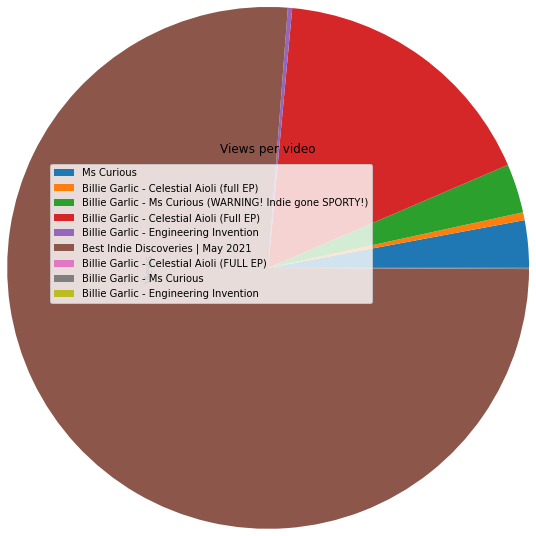

In [27]:
videos_df.plot.pie(y = 'Views', title = "Views per video", labels = videos_df['Title'], radius = 3, labeldistance = None)

In [25]:
# Group Views by channel
channel_df = videos_df.groupby(videos_df.Channel).sum()
channel_df

,Views
Channel,
Billie Garlic,10876
Billie Garlic - Topic,8394
The Cassette Box,211
The Daily Dose,266925


Plot views by channel in pie chart.

<AxesSubplot:title={'center':'Views per video'}, ylabel='Views'>

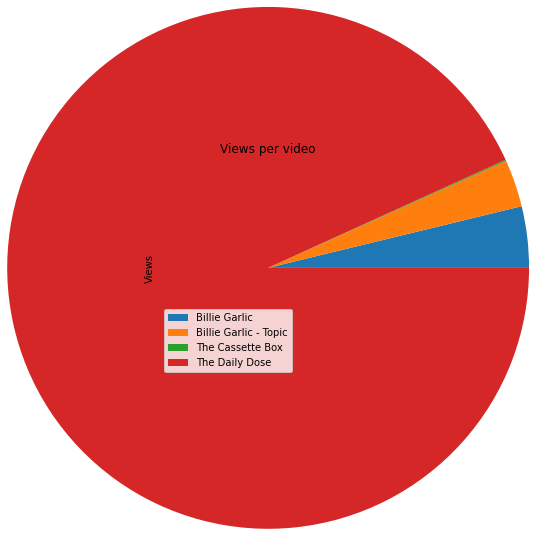

In [31]:
channel_df.plot.pie(y = 'Views', title = "Views per video", radius = 3, labeldistance = None)